
- Author:  Jorge Raúl Rocha López, A01740816
- Date: 2024/05/02
- Course: MA2007.602

# Problema 01:

Pokemon ha sido un juego de video y cartas que ha estado en el radar de muchos jóvenes y adultos, al grado que actualmente se ha visto un auge en la versión competitiva en los
juegos de video. Un pokemon cuenta con diferentes características que lo hacen único, entre ellas se encuentran el tipo de pokemon, el ataque, la defensa, la velocidad, la vida, entre
otros. En la versión competitiva se busca tener un equipo balanceado que pueda enfrentar a cualquier tipo de pokemon, por lo que se busca tener un equipo que tenga un balance
entre ataque, defensa, velocidad y vida. Otros elementos que se buscan en un equipo son el tipo de pokemon, ya que algunos tipos son más fuertes que otros, por lo que se busca
tener un equipo que pueda enfrentar a cualquier tipo de pokemon, el cual tiene tipos principales y secundarios.


### La problematica es encontrar un equipo de 6 pokemones que cumpla con las siguientes características:
1. Que el equipo tenga un balance entre ataque, defensa, velocidad y vida.
2. Que el equipo tenga un balance entre los tipos de pokemon para garantizar que pueda enfrentar a cualquier tipo de pokemon.


Las preguntas de la investigación que se buscan responder con este trabajo son:
1. ¿Cuál es el equipo de 6 pokemones que cumple con las características mencionadas?
2. ¿De qué manera se puede usar los algoritmos de TDA para encontrar un equipo de 6 pokemones que sean balanceados en ataque, defensa, velocidad y vida?
3. ¿Cómo la topología nos puede brindar información sobre los equipos de pokemones?

### Procedemos a leer los datos y hacer un análisis exploratorio de los mismos:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Cargamos los datos
datos = pd.read_csv("Pokemon.csv")
# Mostramos los primeros 5 datos
datos.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Eliminamos los duplicados, en el dataframe, para evitar que se repitan los pokemones en el equipo, (en el caso de que existan).


In [4]:
datos.drop_duplicates(keep="first", inplace=True)

In [5]:
datos.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Estos datos contienen la información de 721 pokemon, (estamos contando como igual a los pokemones que tienen megaevoluciones), y se encuentran en un archivo llamado `pokemon.csv`.

Esta información fue recapitulada de la página web: `https://www.kaggle.com/datasets/abcsds/pokemon?resource=download`.


Podemos ver que el dataset cuenta con 800 filas y 12 columnas, las cuales son las siguientes:

- #: Número de pokemon $\rightarrow$ Integer
- Name: Nombre del pokemon $\rightarrow$ String
- Type 1: Tipo principal del pokemon $\rightarrow$ String
- Type 2: Tipo secundario del pokemon $\rightarrow$ String
- Total: Suma de todas las características del pokemon $\rightarrow$ Float
- HP: Puntos de vida del pokemon $\rightarrow$ Float
- Attack: Puntos de ataque del pokemon $\rightarrow$ Float
- Defense: Puntos de defensa del pokemon $\rightarrow$ Float
- Sp. Atk: Puntos de ataque especial del pokemon $\rightarrow$ Float
- Sp. Def: Puntos de defensa especial del pokemon $\rightarrow$ Float
- Speed: Puntos de velocidad del pokemon $\rightarrow$ Float
- Generation: Generación a la que pertenece el pokemon $\rightarrow$ Integer
- Legendary: Si el pokemon es legendario o no $\rightarrow$ Boolean

In [6]:
columnas = datos.columns

for columna in columnas:
    print(f"Datos de la columna {columna}, tipo de dato: {datos[columna].dtype}")

Datos de la columna #, tipo de dato: int64
Datos de la columna Name, tipo de dato: object
Datos de la columna Type 1, tipo de dato: object
Datos de la columna Type 2, tipo de dato: object
Datos de la columna Total, tipo de dato: int64
Datos de la columna HP, tipo de dato: int64
Datos de la columna Attack, tipo de dato: int64
Datos de la columna Defense, tipo de dato: int64
Datos de la columna Sp. Atk, tipo de dato: int64
Datos de la columna Sp. Def, tipo de dato: int64
Datos de la columna Speed, tipo de dato: int64
Datos de la columna Generation, tipo de dato: int64
Datos de la columna Legendary, tipo de dato: bool


Para que sea más fácil tanto trabajar con los datos, se procederá a cambiar el nombre de las de tipos de pokemon a valores numéricos, para que sean una etiqueta más fácil de manejar.

In [65]:
# Vamos a cambiar las columnas de tipos, para que sea una categoría númerica:

dic_tipos = {
    np.nan: 0,
    "Grass": 1,
    "Fire": 2,
    "Water": 3,
    "Bug": 4,
    "Normal": 5,
    "Poison": 6,
    "Electric": 7,
    "Ground": 8,
    "Fairy": 9,
    "Fighting": 10,
    "Psychic": 11,
    "Rock": 12,
    "Ghost": 13,
    "Ice": 14,
    "Dragon": 15,
    "Dark": 16,
    "Steel": 17,
    "Flying": 18,
}

dic_tipos_inverse = {v: k for k, v in dic_tipos.items()}


def cambiar_columnas_tipos(datos: pd.DataFrame) -> pd.DataFrame:
    columnas_a_cambiar = ["Type 1", "Type 2"]

    for columna in columnas_a_cambiar:
        datos[columna] = datos[columna].map(dic_tipos)
    return datos

In [8]:
# Solo correr una vez
datos = cambiar_columnas_tipos(datos)

In [149]:
datos.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,1,6,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,1,6,405,60,62,63,80,80,60,1,False
2,3,Venusaur,1,6,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,1,6,625,80,100,123,122,120,80,1,False
4,4,Charmander,2,0,309,39,52,43,60,50,65,1,False


Vamos a crear dos nuevas columnas que se llamarán Prop_weakness , las cuales serán la proporción de debilidades  tiene el pokemon de acuerdo a sus tipos. Esto con el fin de ayudar a encontrar un equipo balanceado en cuanto a tipos de pokemon.


In [219]:
# Diccionario de debilidades de tipos
dic_debilidades = {
    0: [],
    1: [2, 14, 6, 18, 4],
    2: [3, 8, 12],
    3: [7, 1],
    4: [2, 18, 12],
    5: [10],
    6: [8, 11],
    7: [8],
    8: [3, 1, 14],
    9: [6, 17],
    10: [18, 11, 9],
    11: [4, 13, 16],
    12: [3, 1, 10, 8, 17],
    13: [13, 16],
    14: [2, 10, 12, 17],
    15: [14, 15, 9],
    16: [10, 4, 9],
    17: [2, 10, 8],
    18: [7, 14, 12],
}

dic_sin_efecto = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [13],
    6: [],
    7: [],
    8: [7],
    9: [15],
    10: [],
    11: [],
    12: [],
    13: [5, 10],
    14: [],
    15: [],
    16: [11],
    17: [6],
    18: [8],
}

dic_not_very_effective = {
    0: [],
    1: [3, 7, 1, 8],
    2: [2, 1, 14, 17, 9],
    3: [2, 3, 14, 17],
    4: [1, 10, 8],
    5: [],
    6: [1, 10, 6, 4, 9],
    7: [7, 18, 17],
    8: [6, 12],
    9: [10, 4, 16],
    10: [4, 12, 16],
    11: [10, 11],
    12: [5, 2, 6, 18],
    13: [6, 4],
    14: [14],
    15: [2, 3, 7, 1],
    16: [13, 16],
    17: [5, 1, 14, 18, 11, 4, 12, 15, 17, 9],
    18: [1, 10, 4],
}

In [40]:
def Types_by_pokemon(datos: pd.DataFrame) -> dict:
    frecuencia_tipos = {}
    numeros_vistos = []
    diccionario_poke_poke = {}

    for dato in datos.iterrows():
        tipo_1 = dato[1]["Type 1"]
        tipo_2 = dato[1]["Type 2"]
        id = dato[1]["#"]
        if id not in numeros_vistos:
            numeros_vistos.append(id)
            frecuencia_tipos[id] = [(tipo_1, tipo_2)]
        elif id in numeros_vistos:
            frecuencia_tipos[id].append((tipo_1, tipo_2))

    return frecuencia_tipos

In [55]:
tipos_por_pokemon = Types_by_pokemon(datos)

In [45]:
def Count_types(tipos_dict: dict) -> dict:
    frecuencia_tipos = {}
    for key, value in tipos_dict.items():
        for tipo in value:
            if tipo in frecuencia_tipos:
                frecuencia_tipos[tipo] += 1
            else:
                frecuencia_tipos[tipo] = 1
    return frecuencia_tipos

In [57]:
Count_of_types = Count_types(tipos_por_pokemon)

In [87]:
max_10 = dict(sorted(Count_of_types.items(), key=lambda x: x[1], reverse=True)[:10])
min_10 = dict(sorted(Count_of_types.items(), key=lambda x: x[1], reverse=False)[:10])

In [88]:
inverse_min_10 = {v: k for k, v in min_10.items()}


def plot_types(dic_inverse, dic_values, title):
    sns.set_theme()
    plt.figure(figsize=(10, 10))
    sns.barplot(x=list(dic_inverse.values()), y=list(dic_values.keys()))
    plt.xticks(rotation=90, fontsize=10)
    plt.title(title)
    plt.show()

In [95]:
dic_tipos_inverso

{(1, 6): 'Grass - Poison',
 (2, 0): 'Fire',
 (2, 18): 'Fire - Flying',
 (2, 15): 'Fire - Dragon',
 (3, 0): 'Water',
 (4, 0): 'Bug',
 (4, 18): 'Bug - Flying',
 (4, 6): 'Bug - Poison',
 (5, 18): 'Normal - Flying',
 (5, 0): 'Normal',
 (6, 0): 'Poison',
 (7, 0): 'Electric',
 (8, 0): 'Ground',
 (6, 8): 'Poison - Ground',
 (9, 0): 'Fairy',
 (5, 9): 'Normal - Fairy',
 (6, 18): 'Poison - Flying',
 (4, 1): 'Bug - Grass',
 (10, 0): 'Fighting',
 (3, 10): 'Water - Fighting',
 (11, 0): 'Psychic',
 (3, 6): 'Water - Poison',
 (12, 8): 'Rock - Ground',
 (3, 11): 'Water - Psychic',
 (7, 17): 'Electric - Steel',
 (3, 14): 'Water - Ice',
 (13, 6): 'Ghost - Poison',
 (1, 11): 'Grass - Psychic',
 (8, 12): 'Ground - Rock',
 (1, 0): 'Grass',
 (11, 9): 'Psychic - Fairy',
 (14, 11): 'Ice - Psychic',
 (3, 18): 'Water - Flying',
 (3, 16): 'Water - Dark',
 (12, 3): 'Rock - Water',
 (12, 18): 'Rock - Flying',
 (14, 18): 'Ice - Flying',
 (7, 18): 'Electric - Flying',
 (15, 0): 'Dragon',
 (15, 18): 'Dragon - Flying'

In [100]:
inverso_max_10 = {}
for key, value in max_10.items():
    inverso_max_10[key] = dic_tipos_inverso[key]
inverso_max_10

{(5, 0): 'Normal',
 (3, 0): 'Water',
 (11, 0): 'Psychic',
 (1, 0): 'Grass',
 (2, 0): 'Fire',
 (7, 0): 'Electric',
 (5, 18): 'Normal - Flying',
 (10, 0): 'Fighting',
 (4, 0): 'Bug',
 (1, 6): 'Grass - Poison'}

Con esto podemos ver que el dataset con las combinaciones más comunes son los tipos de pokemon que tienen los tipos:
- Normal
- Water
- Psychic
- Grass
- Fire

In [101]:
inverso_min_10 = {}
for key, value in min_10.items():
    inverso_min_10[key] = dic_tipos_inverso[key]
inverso_min_10

{(2, 15): 'Fire - Dragon',
 (7, 15): 'Electric - Dragon',
 (2, 12): 'Fire - Rock',
 (17, 18): 'Steel - Flying',
 (11, 1): 'Psychic - Grass',
 (1, 15): 'Grass - Dragon',
 (4, 3): 'Bug - Water',
 (4, 13): 'Bug - Ghost',
 (15, 9): 'Dragon - Fairy',
 (8, 2): 'Ground - Fire'}

Con esto podemos ver que los tipos de pokemon que son menos comúnes son los siguientes combinaciones de tipos:
- Fire, Dragon
- Electric, Dragon
- Fire, Rock
- Steel, Flying
- Psychic, Grass


In [103]:
def Histograma_frecuencias_tipos(dic_inverso, dic_values, title):
    sns.set_theme()
    plt.figure(figsize=(10, 10))
    sns.barplot(
        x=list(dic_inverso.values()), y=list(dic_values.values()), palette="viridis"
    )
    plt.xticks(rotation=90, fontsize=10)
    plt.title(title)
    plt.show()

/var/folders/th/l_973jss7177y23lq6k2vcvh0000gn/T/ipykernel_1766/750352891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


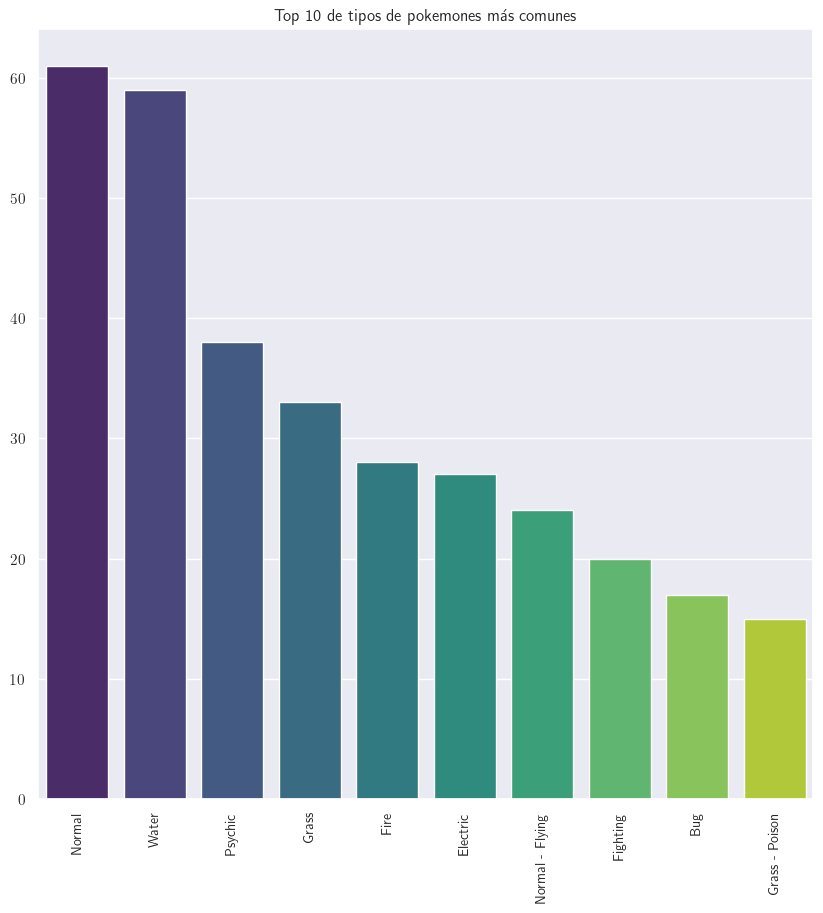

In [104]:
Histograma_frecuencias_tipos(
    inverso_max_10, max_10, "Top 10 de tipos de pokemones más comunes"
)

/var/folders/th/l_973jss7177y23lq6k2vcvh0000gn/T/ipykernel_1766/750352891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


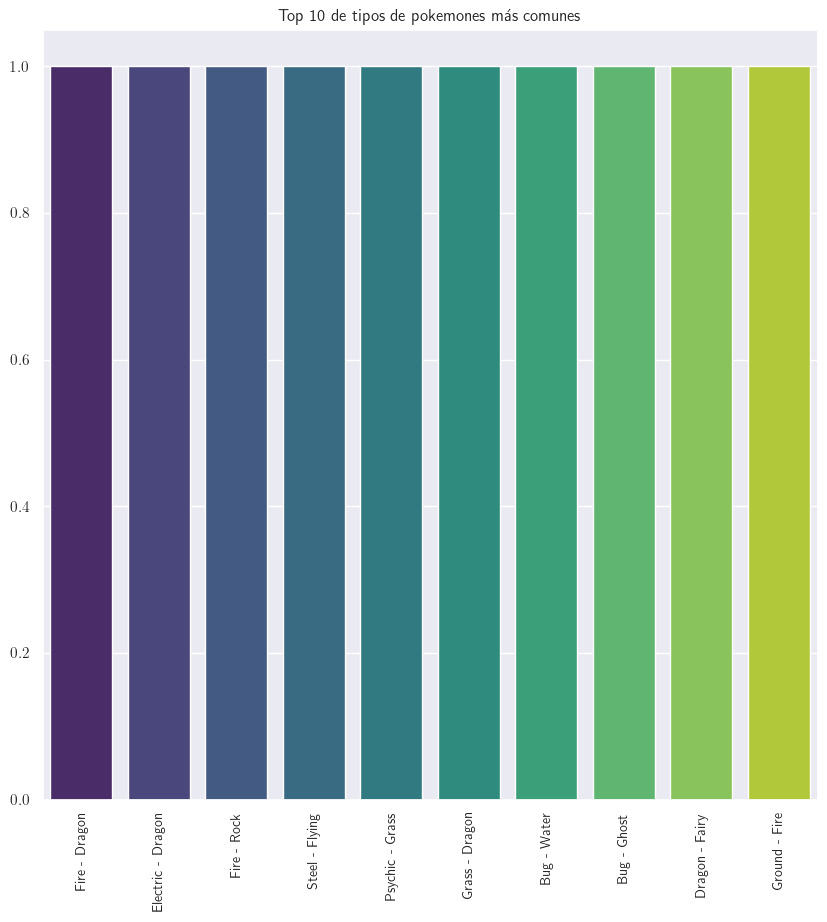

In [105]:
Histograma_frecuencias_tipos(
    inverso_min_10, min_10, "Top 10 de tipos de pokemones más comunes"
)

In [69]:
dic_tipos_inverso = {}

for tipo1, tipo2 in Count_of_types.keys():
    if tipo2 != 0:
        dic_tipos_inverso[(tipo1, tipo2)] = (
            dic_tipos_inverse[tipo1] + " - " + dic_tipos_inverse[tipo2]
        )
    else:
        dic_tipos_inverso[(tipo1, tipo2)] = dic_tipos_inverse[tipo1]


### Gráfica de frecuencias de las diferentes combinaciones de Pokemon:

/var/folders/th/l_973jss7177y23lq6k2vcvh0000gn/T/ipykernel_1766/2975221299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


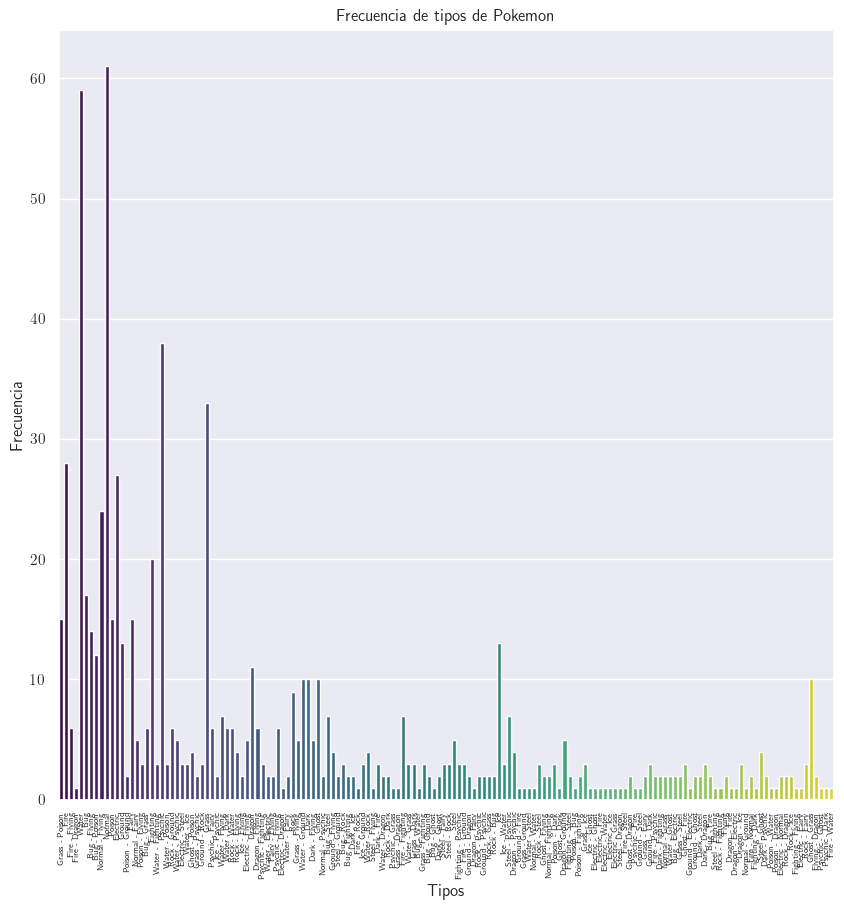

In [77]:
# Creamos un gráfico de barras para mostrar la frecuencia de las diferentes combinaciones de tipos de Pokemon
sns.set_theme()
plt.figure(figsize=(10, 10))
sns.barplot(
    x=list(dic_tipos_inverso.values()),
    y=list(Count_of_types.values()),
    palette="viridis",
)
plt.xticks(rotation=90, fontsize=6)
plt.xlabel("Tipos")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de tipos de Pokemon")
plt.show()

Con esto nos damos cuenta que en el dataset, la mayor combinación de pokemones que se tienen son los de tipo normal y agua, con 61 y 59 pokemones, respectivamente. Mientras que los tipos de pokemon con menos pokemones son los de tipo Fuego-Dragón y Eléctrico-Dragón, con 1 pokemon cada de uno.

In [188]:
Count_of_types

Count_of_types[(3, 8)]

10

In [244]:
import itertools


def Search_weaknesses(types):
    tipo1, tipo2 = types

    debilidades_tipo1 = dic_debilidades[tipo1]
    debilidades_tipo2 = dic_debilidades[tipo2]

    fortalezas_tipo1 = dic_sin_efecto[tipo1]
    fortalezas_tipo2 = dic_sin_efecto[tipo2]

    not_very_effective_tipo1 = dic_not_very_effective[tipo1]
    not_very_effective_tipo2 = dic_not_very_effective[tipo2]

    set_not_very_effective = list(
        set(not_very_effective_tipo1 + not_very_effective_tipo2)
    )

    set_debilidades = list(set(debilidades_tipo1 + debilidades_tipo2))

    set_fortalezas = list(set(fortalezas_tipo1 + fortalezas_tipo2))

    for not_very_effective in set_not_very_effective:
        if not_very_effective in set_debilidades:
            set_debilidades.remove(not_very_effective)

    for fortaleza in set_fortalezas:
        if fortaleza in set_debilidades:
            set_debilidades.remove(fortaleza)

    set_debilidades.append(0)

    debilidades = list(itertools.combinations(set_debilidades, 2))

    return debilidades

In [245]:
Search_weaknesses((2, 10))

[(3, 8),
 (3, 11),
 (3, 18),
 (3, 0),
 (8, 11),
 (8, 18),
 (8, 0),
 (11, 18),
 (11, 0),
 (18, 0)]

In [246]:
def Count_weaknesses(count_types: dict, weakness_dic: dict) -> dict:
    weakness_count = {}
    # Caso más fácil, cuando no tiene tipo 2
    for tipo1, tipo2 in count_types.keys():
        weakness_count[(tipo1, tipo2)] = 0
        debilidades = Search_weaknesses((tipo1, tipo2))

        for debilidad in debilidades:
            if debilidad in count_types.keys():
                weakness_count[(tipo1, tipo2)] += count_types[debilidad]
            else:
                continue

    return weakness_count

In [249]:
dic_count_frequency_weakness = Count_weaknesses(Count_of_types, dic_debilidades)

In [251]:
# Creamos una nueva columna en el DataFrame con la frecuencia de debilidades por la combinacion de tipos
datos["Prop_weakness"] = datos.apply(
    lambda x: (dic_count_frequency_weakness[(x["Type 1"], x["Type 2"])]) / len(datos),
    axis=1,
)

In [253]:
datos.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prop_weakness
0,1,Bulbasaur,1,6,318,45,49,49,65,65,45,1,False,0.12125
1,2,Ivysaur,1,6,405,60,62,63,80,80,60,1,False,0.12125
2,3,Venusaur,1,6,525,80,82,83,100,100,80,1,False,0.12125
3,3,VenusaurMega Venusaur,1,6,625,80,100,123,122,120,80,1,False,0.12125
4,4,Charmander,2,0,309,39,52,43,60,50,65,1,False,0.11000


In [176]:
Count_weaknesses(Count_of_types, dic_debilidades)

{(2, 0): 81,
 (3, 0): 60,
 (4, 0): 39,
 (5, 0): 20,
 (6, 0): 51,
 (7, 0): 13,
 (8, 0): 105,
 (9, 0): 20,
 (10, 0): 55,
 (11, 0): 37,
 (1, 0): 75,
 (15, 0): 39,
 (12, 0): 130,
 (16, 0): 52,
 (13, 0): 20,
 (17, 0): 61,
 (14, 0): 62,
 (18, 0): 49}

### Vamos a hacer un mapper para visualizar los datos tomando en cuenta únicamente los tipos de pokemon y su Total.

Esto lo hacemos para poder visualizar de una mejor manera los datos y poder hacer un análisis más detallado de los mismos. Ver cómo y que componentes conexas se forman con los datos y vamos a analizar cada uno de los clusters que se formen para poder encontrar un equipo balanceado de pokemones.

In [177]:
# Vamos a usar TDA para hacer un mapper
import kmapper as km
from sklearn.cluster import KMeans, DBSCAN
import persim
import sklearn.manifold
import ripser


mapper = km.KeplerMapper(verbose=1)

datos2 = datos[["Type 1", "Type 2", "Total"]]

projected_data = mapper.fit_transform(datos2, projection=["Total"])

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: Total
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (800, 3)

..Projecting data using: Total

..Scaling with: MinMaxScaler()



In [178]:
covering = km.Cover(n_cubes=3, perc_overlap=0.2)

In [179]:
G = mapper.map(
    projected_data,
    X=datos2,
    clusterer=KMeans(n_clusters=2),
    cover=covering,
)

Mapping on data shaped (800, 3) using lens shaped (800, 3)

Creating 27 hypercubes.

Created 131 edges and 54 nodes in 0:00:00.113596.


In [180]:
mapper.visualize(
    G,
    title="Pokemon Mapper",
    # custom_tooltips = performance_data['gender'].to_numpy(),
    color_values=datos2["Type 1"].to_numpy(),
    color_function_name="Height of the point",
    node_color_function=np.array(["average", "std", "sum", "max", "min"]),
)

Wrote visualization to: mapper_visualization_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Pokemon Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weig

### Vamos a usar otro mapper pero ahora utilizando los tipos de pokemon, su Total y su Prop_weakness.



In [254]:
mapper2 = km.KeplerMapper(verbose=1)
datos_ = datos[["Type 1", "Type 2", "Total", "Prop_weakness"]]
projected_data2 = mapper2.fit_transform(datos_, projection=["Prop_weakness"])

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: Prop_weakness
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (800, 4)

..Projecting data using: Prop_weakness

..Scaling with: MinMaxScaler()



In [277]:
covering2 = km.Cover(n_cubes=3, perc_overlap=0.2)

In [278]:
G = mapper2.map(
    projected_data2, X=datos_, clusterer=KMeans(n_clusters=2), cover=covering2
)

Mapping on data shaped (800, 4) using lens shaped (800, 4)

Creating 81 hypercubes.

Created 570 edges and 148 nodes in 0:00:00.188004.


In [279]:
mapper2.visualize(
    G,
    title="Pokemon Mapper 2",
    color_values=datos_["Type 1"].to_numpy(),
    color_function_name="Height of the point",
    node_color_function=np.array(["average", "std", "sum", "max", "min"]),
)


Wrote visualization to: mapper_visualization_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Pokemon Mapper 2 | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-we

Para el análisis del resultado de mappper, vamos a analizar los clusters que se formen y vamos a buscar un equipo de 6 pokemones que cumpla con las características mencionadas anteriormente. Vamos a buscar entre las diferentes componentes conexas (islas) que se formen en el mapper y vamos a buscar un equipo de 6 pokemones que cumpla con las características mencionadas anteriormente.

Ahora vamos a hacer un análisis de los datos para poder encontrar un equipo balanceado de pokemones. Tomando en cuenta los clusters que se formaron en el mapper anterior, vamos a analizar cada uno de los clusters para poder encontrar un equipo balanceado de pokemones.

In [280]:
nodos_juntos_verdes = ["cube77_cluster0", "cube50_cluster1", "cube51_cluster0"]

In [281]:
# Vemos el primer cluster que se formó
datos.iloc[G["nodes"][nodos_juntos_verdes[0]]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prop_weakness
409,373,SalamenceMega Salamence,15,18,700,95,145,130,120,90,120,3,False,0.06500
425,384,Rayquaza,15,18,680,105,150,90,150,90,95,3,True,0.06500
426,384,RayquazaMega Rayquaza,15,18,780,105,180,100,180,100,115,3,True,0.06500
540,483,Dialga,17,15,680,100,120,120,150,100,90,4,True,0.04125
544,487,GiratinaAltered Forme,13,15,680,150,100,120,100,120,90,4,True,0.07750
545,487,GiratinaOrigin Forme,13,15,680,150,120,100,120,100,90,4,True,0.07750
710,646,Kyurem,15,14,660,125,130,90,130,90,95,5,True,0.08375
711,646,KyuremBlack Kyurem,15,14,700,125,170,100,120,90,95,5,True,0.08375
712,646,KyuremWhite Kyurem,15,14,700,125,120,90,170,100,95,5,True,0.08375
793,717,Yveltal,16,18,680,126,131,95,131,98,99,6,True,0.08500


In [284]:
datos.iloc[G["nodes"][nodos_juntos_verdes[0]]].describe()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Prop_weakness
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,525.300000,14.900000,15.900000,694.000000,120.600000,136.600000,103.500000,137.100000,97.800000,98.400000,4.200000,0.072750
std,128.367571,1.197219,1.852926,32.727834,19.386135,24.699078,14.539219,24.937477,9.162726,10.543034,1.032796,0.013867
min,373.000000,13.000000,14.000000,660.000000,95.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000,0.041250
25%,408.750000,15.000000,14.250000,680.000000,105.000000,120.000000,91.250000,120.000000,90.000000,91.250000,3.250000,0.065000
50%,487.000000,15.000000,15.000000,680.000000,125.000000,130.500000,100.000000,130.500000,99.000000,95.000000,4.000000,0.077500
75%,646.000000,15.000000,18.000000,700.000000,125.750000,148.750000,115.000000,150.000000,100.000000,98.000000,5.000000,0.083750
max,717.000000,17.000000,18.000000,780.000000,150.000000,180.000000,130.000000,180.000000,120.000000,120.000000,6.000000,0.085000


Podemos ver que el promedio del Total es bastante alto, por lo que podemos decir que los pokemones que se encuentran en el cluster 0 son pokemones bastante fuertes. La media de la Proporción de debilidad es  de 0.0727, lo cual es bastante bajo y la desvicación estándar del mismo es también bastante bajo. La media de la velocidad es de 98.4 lo que nos dice que son pokemones que tienen una velocidad ligeramente superior a la media. La medida de vida es medai 120.6, lo cual nos dice que son pokemones que tienen una vida bastante alta comparada con la media.

In [285]:
datos.iloc[G["nodes"][nodos_juntos_verdes[1]]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prop_weakness
269,249,Lugia,11,18,680,106,90,130,90,154,110,2,True,0.0950
544,487,GiratinaAltered Forme,13,15,680,150,100,120,100,120,90,4,True,0.0775
545,487,GiratinaOrigin Forme,13,15,680,150,120,100,120,100,90,4,True,0.0775
798,720,HoopaHoopa Unbound,11,16,680,80,160,60,170,130,80,6,True,0.0400


In [286]:
datos.iloc[G["nodes"][nodos_juntos_verdes[1]]].describe()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Prop_weakness
count,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,485.750000,12.000000,16.000000,680.0,121.500000,117.500000,102.500000,120.000000,126.000000,92.500000,4.000000,0.072500
std,192.290362,1.154701,1.414214,0.0,34.578413,30.956959,30.956959,35.590261,22.449944,12.583057,1.632993,0.023184
min,249.000000,11.000000,15.000000,680.0,80.000000,90.000000,60.000000,90.000000,100.000000,80.000000,2.000000,0.040000
25%,427.500000,11.000000,15.000000,680.0,99.500000,97.500000,90.000000,97.500000,115.000000,87.500000,3.500000,0.068125
50%,487.000000,12.000000,15.500000,680.0,128.000000,110.000000,110.000000,110.000000,125.000000,90.000000,4.000000,0.077500
75%,545.250000,13.000000,16.500000,680.0,150.000000,130.000000,122.500000,132.500000,136.000000,95.000000,4.500000,0.081875
max,720.000000,13.000000,18.000000,680.0,150.000000,160.000000,130.000000,170.000000,154.000000,110.000000,6.000000,0.095000


Podemos ver que algunos pokemones de este cluster son parecidos a los anteriores , el promedio de vida es similar al anterior, el promedio de prop_weakness es igual al cluster anterior. También la velocidad es similar aunque es un poco menor que el anterior. Pero el Total es mayor que el cluster anterior.



In [288]:
datos.iloc[G["nodes"][nodos_juntos_verdes[2]]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prop_weakness
269,249,Lugia,11,18,680,106,90,130,90,154,110,2,True,0.095


Podemos ver que el prop_weakness es bajo, el total es bastnate alto y pues es únicamente un pokemon. Lugia que es bastante fuerte y tiene una vida bastante alta.

In [289]:
nodo_azul = "cube46_cluster1"

datos.iloc[G["nodes"][nodo_azul]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prop_weakness
611,551,Sandile,8,16,292,50,72,35,35,35,65,5,False,0.21875


Podemos ver que este cluster tiene un solo pokemon, el cual es bastante malo. Y su proporción de debilidad es bastante alta, lo cual nos dice que es un pokemon bastante débil. 

In [290]:
nodo_morados = ["cube23_cluster1"]

datos.iloc[G["nodes"][nodo_morados[0]]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prop_weakness
7,6,CharizardMega Charizard X,2,15,634,78,130,111,130,85,100,1,False,0.0500
541,484,Palkia,3,15,680,90,120,100,150,120,100,4,True,0.0325


In [291]:
datos.iloc[G["nodes"][nodo_morados[0]]].describe()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Prop_weakness
count,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.00000,2.000000
mean,245.000000,2.500000,15.0,657.000000,84.000000,125.000000,105.500000,140.000000,102.500000,100.0,2.50000,0.041250
std,337.997041,0.707107,0.0,32.526912,8.485281,7.071068,7.778175,14.142136,24.748737,0.0,2.12132,0.012374
min,6.000000,2.000000,15.0,634.000000,78.000000,120.000000,100.000000,130.000000,85.000000,100.0,1.00000,0.032500
25%,125.500000,2.250000,15.0,645.500000,81.000000,122.500000,102.750000,135.000000,93.750000,100.0,1.75000,0.036875
50%,245.000000,2.500000,15.0,657.000000,84.000000,125.000000,105.500000,140.000000,102.500000,100.0,2.50000,0.041250
75%,364.500000,2.750000,15.0,668.500000,87.000000,127.500000,108.250000,145.000000,111.250000,100.0,3.25000,0.045625
max,484.000000,3.000000,15.0,680.000000,90.000000,130.000000,111.000000,150.000000,120.000000,100.0,4.00000,0.050000


Podemos ver que en este cluster tiene 2 pokemones y el promedio de de vida es bajo comparado con los primeros clusters y el promedio de prop_weakness es bastante bajo. El promedio de velocidad es bastante alto y el promedio de Total es bastante alto. Lo que nos dice que estos sí debenen de ser pokemones bastante fuertes y a considerar.

In [293]:
nodo_azul_claro = ["cube41_cluster1"]

datos.iloc[G["nodes"][nodo_azul_claro[0]]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prop_weakness
163,150,MewtwoMega Mewtwo X,11,10,780,106,190,100,154,100,130,1,True,0.03875


Podemos ver que este cluster tiene 1 pokemon y es bastante fuerte, tiene una vida bastante alta y su proporción de debilidad es bastante baja. Por lo que sí es un pokemon a considerar para el equipo.

In [295]:
nodos_muy_morados = ["cube19_cluster1", "cube22_cluster0"]

In [299]:
datos.iloc[G["nodes"][nodos_muy_morados[0]]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prop_weakness
509,459,Snover,1,14,334,60,62,50,62,60,40,4,False,0.20625


In [300]:
datos.iloc[G["nodes"][nodos_muy_morados[1]]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prop_weakness
511,460,AbomasnowMega Abomasnow,1,14,594,90,132,105,132,105,30,4,False,0.20625


In [311]:
nodos_amarillos = ["cube70_cluster1"]

datos.iloc[G["nodes"][nodos_amarillos[0]]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prop_weakness
224,208,SteelixMega Steelix,17,8,610,75,125,230,55,95,30,2,False,0.18


Podemos ver que este cluster tiene 1 pokemon y es bastante fuerte, tiene una vida bastante alta y su proporción de debilidad es bastante alta. Pero su velocidad es bastante baja.

In [312]:
nodos_juntos = ["cube71_cluster0", "cube72_cluster1"]
datos.iloc[G["nodes"][nodos_juntos[0]]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prop_weakness
243,225,Delibird,14,18,330,45,55,45,65,45,75,2,False,0.09625
685,624,Pawniard,16,17,340,45,85,70,40,40,60,5,False,0.08875
694,633,Deino,16,15,300,52,65,50,45,50,38,5,False,0.09750
748,679,Honedge,17,13,325,45,80,100,35,37,28,6,False,0.08750
790,714,Noibat,18,15,245,40,30,35,45,40,55,6,False,0.06500


In [313]:
datos.iloc[G["nodes"][nodos_juntos[1]]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Prop_weakness
243,225,Delibird,14,18,330,45,55,45,65,45,75,2,False,0.09625
330,304,Aron,17,12,330,50,70,100,40,40,30,3,False,0.13125
694,633,Deino,16,15,300,52,65,50,45,50,38,5,False,0.09750


Podemos ver que estos cluster se parecen en cuanto a los pokemones que se tienen y a la velocidad y en cuanto a la proporcio+pn de debilidad .Pero son pokemones bastnate débiles.

Por lo que en base a esos resultados y usando los cluster anteriormente mencionados haría que el equipo de 6 pokemones serían:
- Palkia
- MewtwoMega Mewtwo X
- HoopaHoopa Unbound
- RayquazaMega Rayquaza
- Dialga
- Lugia